# Using Data to Describe Top Movies

Are some movies more highly regarded by critics than by audiences? Do movie preferences change between the user bases of different movie websites? What do top rated movies have in common? To answer these questions, I will be analyzing the data of ratings from two major movie sites, IMDb and Rotten Tomatoes, and comparing and contrasting the different scores they have assigned.

In [1]:
import requests
import json
import pandas

### Data Set 1 - IMDb

The IMDb API is a 3rd party API used to pull data from IMDb, a major movie database (IMDb does have an official API. The free access options aren't suitable for this project, so I used this API instead). Most of the API calls available retrieve one movie at a time given an ID. A few calls can obtain data from lists the site publishes, such as top rated movies or top grossing movies. The specific call used produces a data set of the site's 250 highest rated movies.

**Update:** Since I finished this project, the IMDb API has been paywalled. The included API key no longer works. The output has been included in a JSON file in this repository in order to recreate the analysis.

In [52]:
resp = requests.get('https://imdb-api.com/en/API/Top250Movies/k_vg02yato')
imdb = json.loads(resp.text)['items']

imdb

[{'id': 'tt0111161',
  'rank': '1',
  'title': 'The Shawshank Redemption',
  'fullTitle': 'The Shawshank Redemption (1994)',
  'year': '1994',
  'image': 'https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX128_CR0,3,128,176_AL_.jpg',
  'crew': 'Frank Darabont (dir.), Tim Robbins, Morgan Freeman',
  'imDbRating': '9.2',
  'imDbRatingCount': '2666085'},
 {'id': 'tt0068646',
  'rank': '2',
  'title': 'The Godfather',
  'fullTitle': 'The Godfather (1972)',
  'year': '1972',
  'image': 'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX128_CR0,1,128,176_AL_.jpg',
  'crew': 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino',
  'imDbRating': '9.2',
  'imDbRatingCount': '1847520'},
 {'id': 'tt0468569',
  'rank': '3',
  'title': 'The Dark Knight',
  'fullTitle': 'The Dark Knight (2008)',
  'year': '2008',
  'image': 'https://m.media-amazon.com/ima

From here, let's clean the data a bit and convert the dictionary to a data frame:

In [53]:
for movie in imdb:

    #Convert the rating out of 10 to a score out of 100
    #This is the scale rotten tomatoes uses, so this will make comparisons easier
    rating_num = float(movie['imDbRating'])
    movie['imDbRating'] = rating_num * 10
    
    #Separate the director from actors
    movie['crew'] = movie['crew'].split(",")
    
    director = movie['crew'][0]
    movie['director'] = director[:-7]
    
    movie['actors'] = movie['crew'][1].strip() + ', ' + movie['crew'][2].strip()

#Create a data frame from the data    
imdb_df = pandas.DataFrame(imdb)

#Keep only the relevant columns
imdb_df = imdb_df[['title', 'fullTitle', 'year', 'imDbRating', 'director']]
imdb_df.head() 

,title,fullTitle,year,imDbRating,director
0,The Shawshank Redemption,The Shawshank Redemption (1994),1994,92.0,Frank Darabont
1,The Godfather,The Godfather (1972),1972,92.0,Francis Ford Coppola
2,The Dark Knight,The Dark Knight (2008),2008,90.0,Christopher Nolan
3,The Godfather Part II,The Godfather Part II (1974),1974,90.0,Francis Ford Coppola
4,12 Angry Men,12 Angry Men (1957),1957,90.0,Sidney Lumet


After cleaning, here's an overview of the remaining columns of interest:

In [55]:
imdb_df.dtypes

title          object
fullTitle      object
year           object
imDbRating    float64
director       object
dtype: object

array([[<AxesSubplot:title={'center':'imDbRating'}>]], dtype=object)

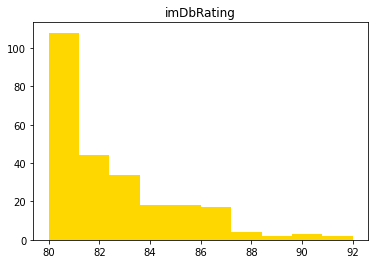

In [71]:
imdb_df.hist(color = 'gold', grid = False)

The `fullTitle` variable is formatted Title (Year). It's useful to distinguish different movies that may share the same name. The `imDbRating` is based on user reviews. It's originally a score out of 10. For this table, ratings have been multiplied by 10 to become a score out of 100 in order to compare with Rotten Tomatoes ratings. The other columns should be self-explanatory from their names.

The ratings, the one quantitative variable of interest, is a float. Everything else is a text object. Nearly all the ratings are in the low-to-mid-80s. None of these would appear to be outliers, as these are reasonable scores for something highly rated on a scale of 100.

### Data Set 2 - Rotten Tomatoes

The other data set I'll be using comes from Rotten Tomatoes, another major movie review site. This data has been downloaded from https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset and is split into two files. One contains all individual reviews for each movie (which Rotten Tomatoes aggregates for its ratings), and the other contains descriptive information of each movie. The latter contains the overall rating scores, so this will be sufficient for comparing with the IMDb data. 

Because the data has been downloaded and is imported directly into pandas, the setup of this table is a little simpler:

In [54]:
rt = pandas.read_csv('data/rotten_tomatoes_movies.csv')

#Changing the release date to a date format
rt['original_release_date'] = pandas.to_datetime(rt['original_release_date'], format='%Y-%m-%d')

#Removing any rows missing a date
rt = rt[rt['original_release_date'].notnull()]

#Adding a new column just for the year
rt['year'] = rt['original_release_date'].dt.year.astype(str)

#Creating a full title field to match the imdb dataset
rt['fullTitle'] = rt['movie_title'] + ' (' + rt['year'] + ')'

#Pulling just the columns that are needed
rt = rt[['movie_title', 'fullTitle', 'year', 'tomatometer_rating', 'audience_rating']]

rt.head()

,movie_title,fullTitle,year,tomatometer_rating,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & the Olympians: The Lightning T...,2010,49.0,53.0
1,Please Give,Please Give (2010),2010,87.0,64.0
2,10,10 (1979),1979,67.0,53.0
3,12 Angry Men (Twelve Angry Men),12 Angry Men (Twelve Angry Men) (1957),1957,100.0,97.0
4,"20,000 Leagues Under The Sea","20,000 Leagues Under The Sea (1954)",1954,89.0,74.0


Again, an overview of the columns included:

In [76]:
rt.dtypes

movie_title            object
fullTitle              object
year                   object
tomatometer_rating    float64
audience_rating       float64
dtype: object

array([[<AxesSubplot:title={'center':'tomatometer_rating'}>,
        <AxesSubplot:title={'center':'audience_rating'}>]], dtype=object)

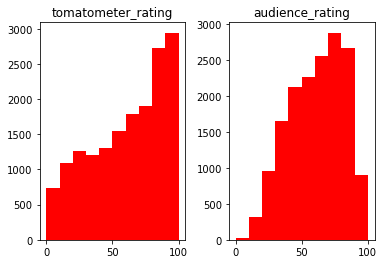

In [68]:
rt.hist(color = 'red', grid = False)

Since most of the descriptive columns are already included in the IMDb data, all that is used in this table are the title and year (for reference) and the different ratings Rotten Tomatoes offers.

Here, the ratings are more spread out since this data is a larger sample of movies. The tomatometer (critic) rating is skewed towards high scores, while the audience ratings are a little more symmetrically distributed. Both scores tend to be higher ratings. While many have ratings much lower than the IMDb set, they still fit within the scale and are not regarded as outliers.

In this data set, there were some missing values to be dealt with. While no ratings were missing, some movies were missing other informational columns. Most of these were not part of the analysis, so leaving those values as null didn't present any issue. However, a missing release date prevented a movie from having a useable key. For this reason, any rows with a missing date had to be removed.

### Merged data

Having cleaned each table and set up columns to fit better with each other, the data frames can now be merged, joining on the `fullTitle`:

In [57]:
movies_df = pandas.merge(rt, imdb_df, left_on = 'fullTitle', right_on = 'fullTitle')

movies_df.head()

,movie_title,fullTitle,year_x,tomatometer_rating,audience_rating,title,year_y,imDbRating,director
0,Aliens,Aliens (1986),1986,97.0,94.0,Aliens,1986,83.0,James Cameron
1,All About Eve,All About Eve (1950),1950,99.0,94.0,All About Eve,1950,82.0,Joseph L. Mankiewicz
2,The Apartment,The Apartment (1960),1960,93.0,94.0,The Apartment,1960,82.0,Billy Wilder
3,Casablanca,Casablanca (1942),1942,99.0,95.0,Casablanca,1942,85.0,Michael Curtiz
4,The Elephant Man,The Elephant Man (1980),1980,92.0,93.0,The Elephant Man,1980,81.0,David Lynch


### Analysis

First, a graph to show the distribution of each score:

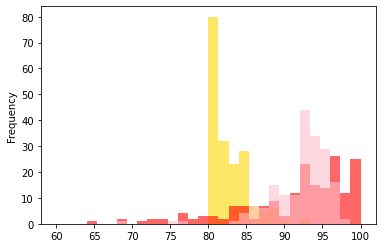

In [7]:
ax1 = movies_df['imDbRating'].plot(kind = 'hist',bins=30, alpha=0.6, range=(60,100), color='Gold')
ax2 = movies_df['tomatometer_rating'].plot(kind = 'hist',bins=30, alpha=0.6, range=(60,100), color='Red', ax=ax1)
ax3 = movies_df['audience_rating'].plot(kind = 'hist',bins=30, alpha=0.6, range=(60,100), color='Pink', ax=ax2)

And some other summary statistics of these ratings:

In [17]:
movies_df[['imDbRating', 'tomatometer_rating', 'audience_rating']].describe()

,imDbRating,tomatometer_rating,audience_rating
count,184.000000,184.000000,183.000000
mean,82.559783,91.445652,92.098361
std,2.403711,7.453849,3.916876
min,80.000000,64.000000,69.000000
25%,81.000000,88.000000,90.000000
50%,82.000000,93.500000,93.000000
75%,84.000000,97.000000,95.000000
max,92.000000,100.000000,98.000000


Overall, both scores on Rotten Tomatoes, from critics and audiences, tend to be higher than IMDb's ratings. This is especially notable since these are the highest rated movies on all of IMDb! It's also possible that the formula to calculate a score is different between these sites. While they tend towards high scores, the Rotten Tomatoes ratings vary more widely as well. It's given that these are a fixed set of IMDB's top movies, so by the nature of the data those ratings will be tightly clustered.

From this analysis, some movies will have a disparity between ratings. We can see which movies have the greatest difference between each of the three scores in our data:

In [49]:
movies_df['rt_difference'] = abs(movies_df['tomatometer_rating'] - movies_df['audience_rating'])
movies_df['imdb_vs_critic'] = abs(movies_df['imDbRating'] - movies_df['audience_rating'])
movies_df['imdb_vs_audience'] = abs(movies_df['imDbRating'] - movies_df['tomatometer_rating'])

movies_df[['title', 'tomatometer_rating', 'audience_rating', 'rt_difference']].nlargest(10, 'rt_difference')

,title,tomatometer_rating,audience_rating,rt_difference
8,Rocky,94.0,69.0,25.0
61,Forrest Gump,71.0,95.0,24.0
80,The Incredibles,97.0,75.0,22.0
49,Dersu Uzala,73.0,94.0,21.0
95,Léon: The Professional,74.0,95.0,21.0
73,Hachi: A Dog's Tale,64.0,84.0,20.0
90,Joker,68.0,88.0,20.0
33,A Beautiful Mind,74.0,93.0,19.0
59,Fight Club,79.0,96.0,17.0
71,The Green Mile,78.0,94.0,16.0


In [47]:
movies_df[['title', 'imDbRating', 'tomatometer_rating', 'imdb_vs_critic']].nlargest(10, 'imdb_vs_critic')

,title,imDbRating,tomatometer_rating,imdb_vs_critic
92,Klaus,81.0,94.0,16.0
46,Cool Hand Luke,80.0,100.0,15.0
183,Yojimbo,81.0,95.0,15.0
49,Dersu Uzala,80.0,73.0,14.0
78,In the Name of the Father,81.0,94.0,14.0
96,Like Stars on Earth,82.0,91.0,14.0
105,Monty Python and the Holy Grail,81.0,97.0,14.0
111,On the Waterfront,81.0,99.0,14.0
116,Pather Panchali,80.0,98.0,14.0
118,Persona,80.0,90.0,14.0


In [48]:
movies_df[['title', 'imDbRating', 'audience_rating', 'imdb_vs_audience']].nlargest(10, 'imdb_vs_audience')

,title,imDbRating,audience_rating,imdb_vs_audience
46,Cool Hand Luke,80.0,95.0,20.0
68,The Grapes of Wrath,80.0,88.0,20.0
149,The Terminator,80.0,89.0,20.0
34,Before Sunrise,81.0,93.0,19.0
155,The Gold Rush,81.0,93.0,19.0
174,The Treasure of the Sierra Madre,81.0,93.0,19.0
179,The Wages of Fear,81.0,95.0,19.0
12,The Kid,82.0,95.0,18.0
41,Chinatown,81.0,93.0,18.0
60,Finding Nemo,81.0,86.0,18.0


Here's a list of the directors who appear most often in the top movie list. This is mostly restricted to IMDb's top movies, since the data is far smaller than Rotten Tomatoes. Many of these names may be familiar to you:

In [20]:
movies_df['director'].value_counts()[:16]

Christopher Nolan    7
Stanley Kubrick      6
Steven Spielberg     6
Martin Scorsese      6
Alfred Hitchcock     5
Charles Chaplin      5
Quentin Tarantino    4
Billy Wilder         4
Akira Kurosawa       3
Ridley Scott         3
Peter Jackson        3
Sergio Leone         3
Frank Capra          3
James Cameron        3
Brad Bird            3
Pete Docter          3
Name: director, dtype: int64

<AxesSubplot:>

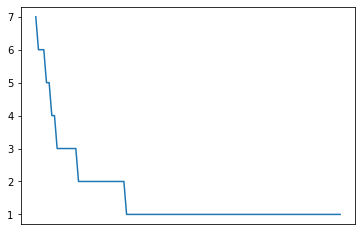

In [50]:
movies_df['director'].value_counts().plot(xticks=[])

While some of the top names on that list appear often, there is still room for many others. Most of the directors in this list only appear once.

For a final field to consider, let's look at the ratings of these movies by the decade of their release:

In [59]:
#Create a new column to get the decade of each movie given the year
movies_df['decade'] = movies_df['year_x'].str.replace(r'\d$', '0s')

movies_df.groupby('decade')['decade'].count()

/var/folders/pm/pg7vykvs70j4hx_8y76ydrrh0000gn/T/ipykernel_77672/3537667607.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['decade'] = movies_df['year_x'].str.replace(r'\d$', '0s')


decade
1920s     4
1930s     6
1940s     9
1950s    14
1960s    12
1970s    17
1980s    22
1990s    34
2000s    34
2010s    32
Name: decade, dtype: int64

<AxesSubplot:>

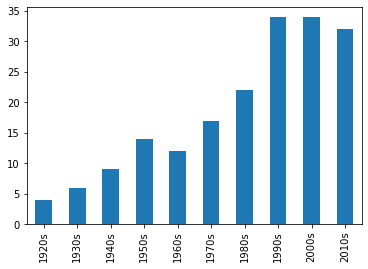

In [64]:
movies_df['decade'].value_counts().sort_index().plot(kind='bar')

In [18]:
movies_df.groupby('decade')[['imDbRating', 'tomatometer_rating', 'audience_rating']].mean()

,imDbRating,tomatometer_rating,audience_rating
decade,,,
1920s,81.500000,98.250000,93.750000
1930s,82.000000,98.333333,93.666667
1940s,82.444444,97.666667,93.000000
1950s,81.857143,95.928571,93.714286
1960s,82.666667,94.416667,94.250000
1970s,82.529412,92.764706,92.000000
1980s,82.000000,90.363636,93.318182
1990s,83.735294,89.823529,93.058824
2000s,82.735294,89.705882,90.647059


More recent movies tend to appear more frequently in the list. On IMDb, a top movie from any decade is likely to be rated about the same. However, Rotten Tomatoes appears to favor the older movies in this list.